In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.multicomp



df=pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Bureau\\diamonds.csv')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [4]:
#pretraitement

df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 10)

In [7]:
df.duplicated().sum()

146

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()
df.shape

(53794, 10)

In [9]:
#la visualisation
num_cols=df._get_numeric_data().columns
print(num_cols)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [10]:
object_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


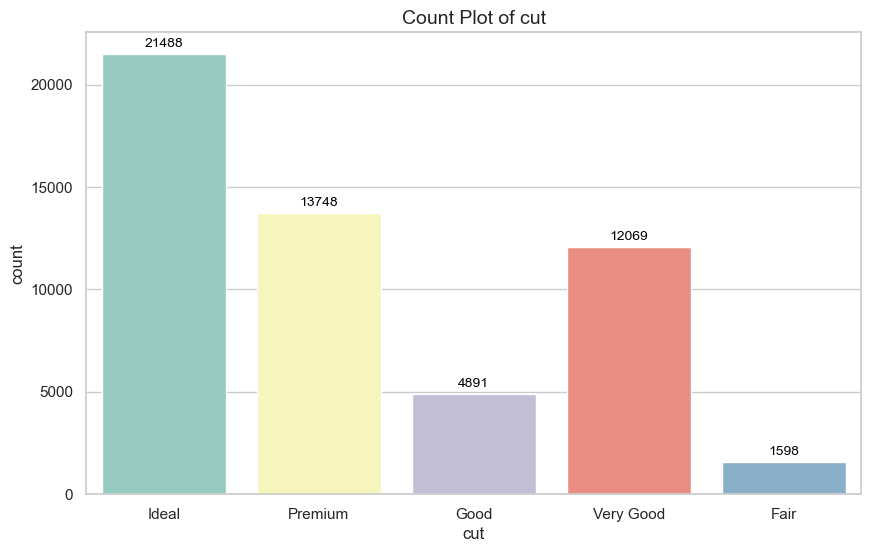

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64
-------------------------


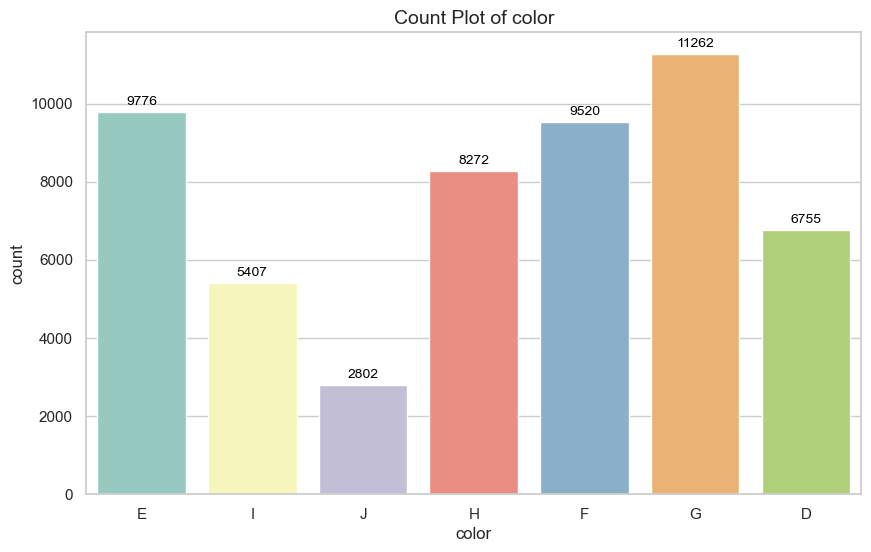

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64
-------------------------


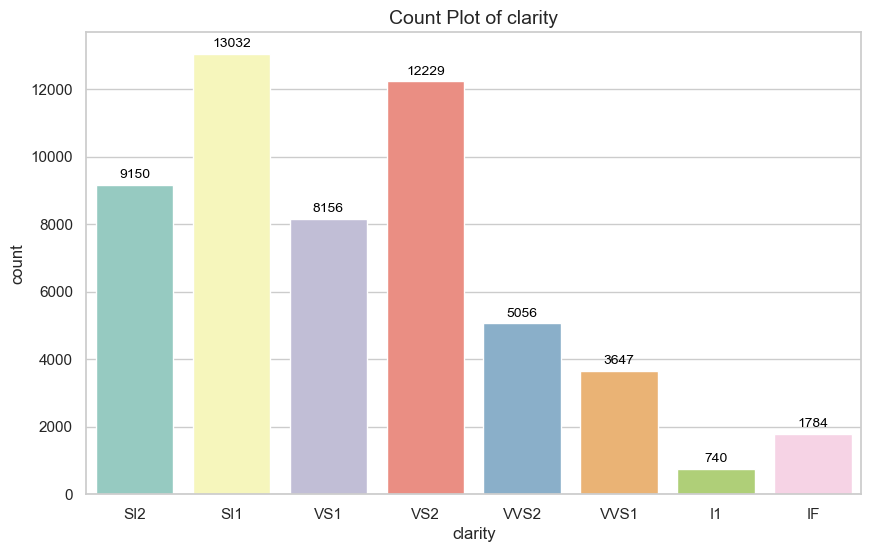

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64
-------------------------


In [11]:
for c in object_cols:
    plt.figure(figsize=(10, 6))
    
    sns.set(style="whitegrid")
    ax = sns.countplot(x=df[c], palette="Set3")
    
    # Add count annotations on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Count Plot of {c}', fontsize=14)
    plt.show()
    
    print(df[c].value_counts())
    print("-" * 25)




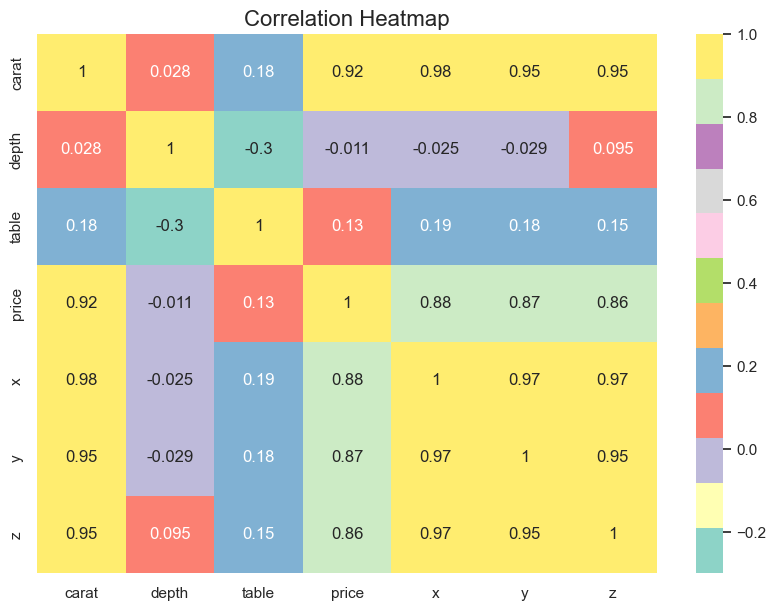

In [12]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="Set3")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [13]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


In [14]:
df[ "color" ].value_counts()

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

In [15]:

colorless = df[df["color"].isin(["E", "F", "H", "D", "I"])]
colorless = colorless[["color", "price"]].reset_index(drop=True)

# Convert 'color' column to categorical
colorless["color"] = colorless["color"].astype("category")

# Remove categories "G" and "J" only if they exist in the original categories
categories_to_remove = ["G", "J"]
existing_categories = set(colorless["color"].cat.categories)
categories_to_remove = [cat for cat in categories_to_remove if cat in existing_categories]

colorless["color"] = colorless["color"].cat.remove_categories(categories_to_remove)

# Check unique categories after removal
print("Unique categories after removal:", colorless["color"].cat.categories)


Unique categories after removal: Index(['D', 'E', 'F', 'H', 'I'], dtype='object')


In [16]:


# Assuming you have already defined colorless DataFrame

# Update the existing "log_price" column with new values
colorless["log_price"] = colorless["price"].apply(lambda price: math.log(price))

# Drop rows with missing values
colorless.dropna(inplace=True)

# Reset the index
colorless.reset_index(drop=True, inplace=True)

# Save to CSV
colorless.to_csv("diamonds.csv", index=False)


In [17]:
#one way anova 
df2 = pd.read_csv ( "diamonds.csv" )
df2.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


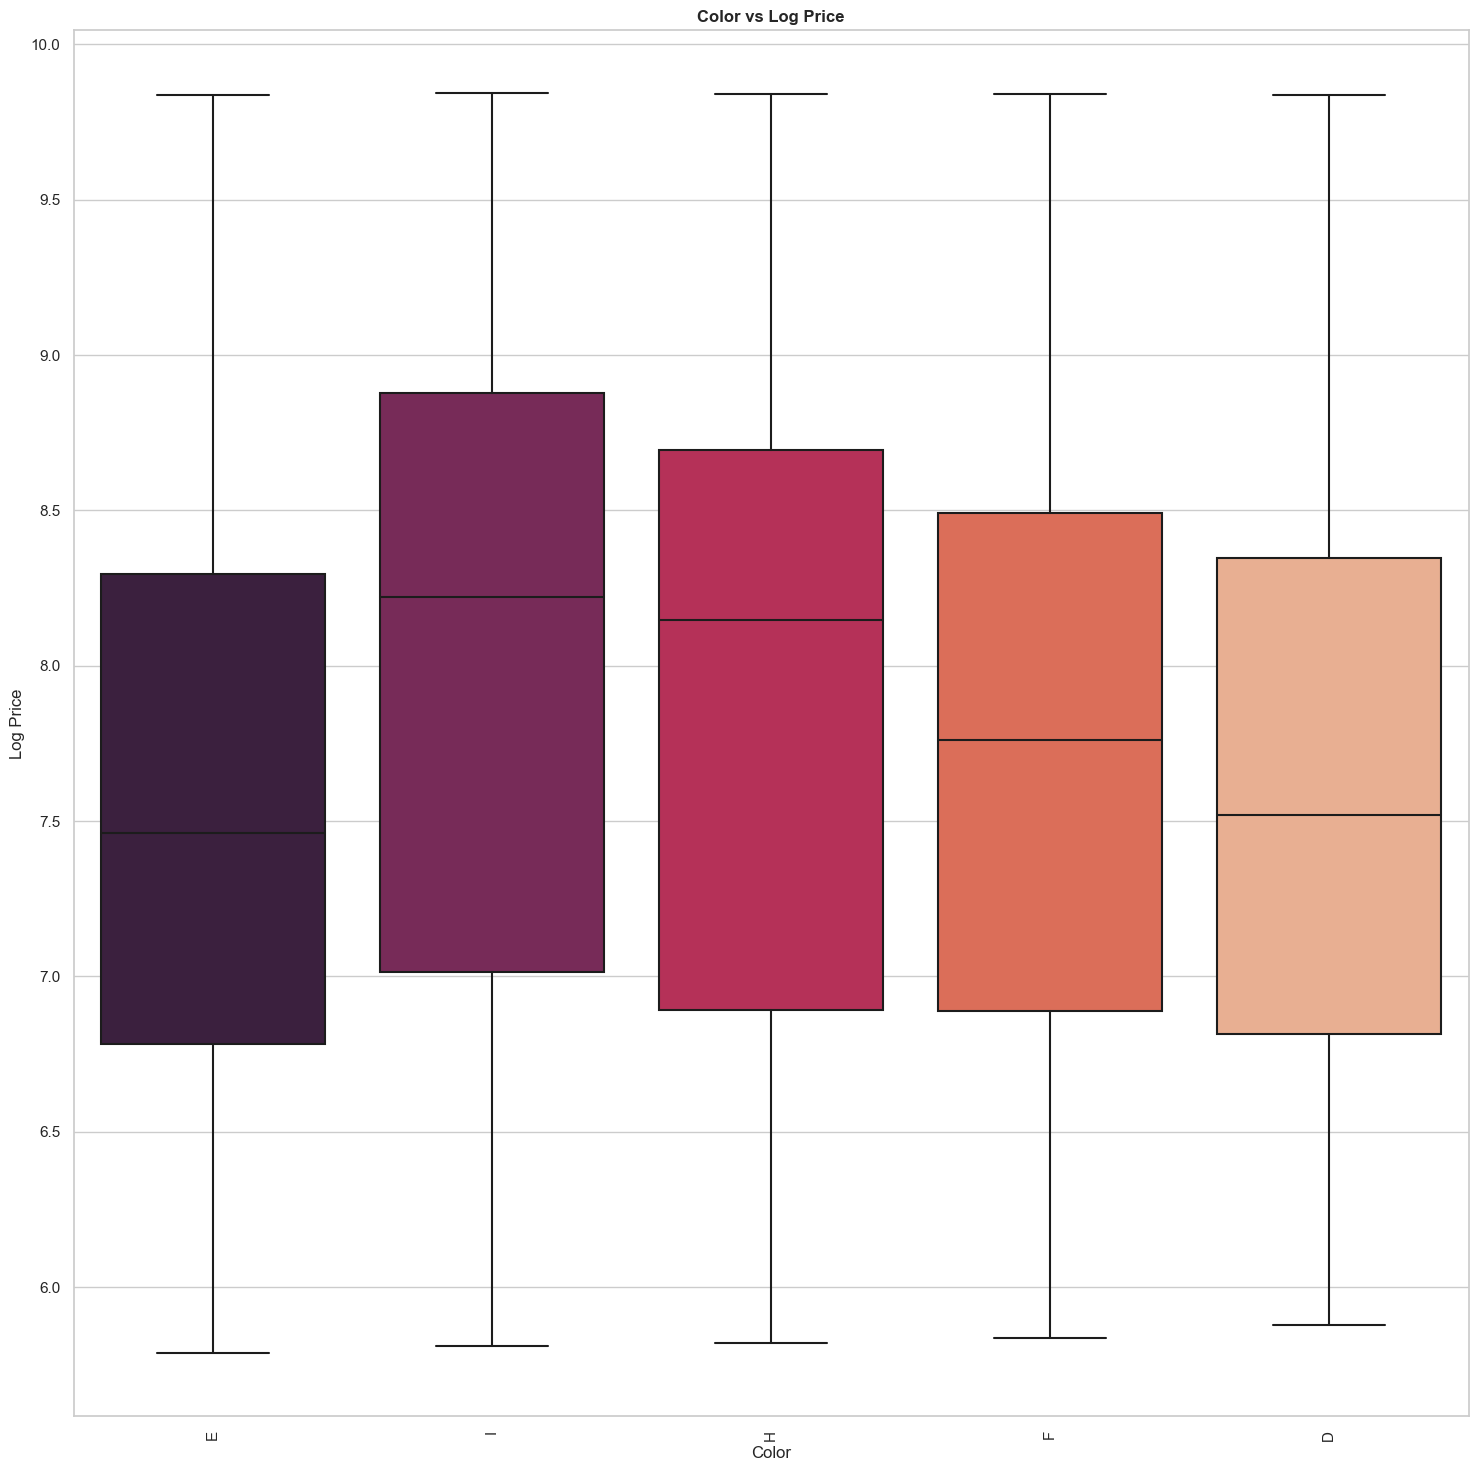

In [18]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "color", y = "log_price", data = df2, palette = 'rocket')
plt.xlabel('Color', fontsize = 12)
plt.ylabel("Log Price", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Color vs Log Price", fontweight='bold')
plt.show()

In [19]:
model_01 =  ols ( formula = "log_price ~ C(color)" , data = df2 ).fit()

In [20]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     261.0
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          8.10e-222
Time:                        21:19:03   Log-Likelihood:                -56024.
No. Observations:               39730   AIC:                         1.121e+05
Df Residuals:                   39725   BIC:                         1.121e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6185      0.012    631.656      0.000       7.595       7.642
C(color)[T.E]    -0.0384      0.016     -2.446      0.014      -0.069      -0.008
C(color)[T.F]     0.1444      0.016      9.158      0.000       0.114       0.175
C(color)[T.H]     0.2999      0.016     18.446      0.000       0.268       0.332
C(color)[T.I]     0.4020      0.018     22.226      0.000       0.367       0.437
==============================================================================
Omnibus:                     7103.524   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1539.475
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#one way anova 
df2 = pd.read_csv ( "diamonds.csv" )
df2.head()
model_01 =  ols ( formula = "log_price ~ C(color)" , data = df2 ).fit()
model_01.summary()


# Creates the ANOVA table
sm.stats.anova_lm ( model_01 ,typ = 2 )


,sum_sq,df,F,PR(>F)
C(color),1026.003949,4.0,261.029097,8.104227e-222
Residual,39035.884625,39725.0,NaN,NaN


In [23]:
import numpy as np

#Two way anova
df3=pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Bureau\\diamonds.csv')

data3 = df3[["color", "cut", "price"]]

# Filter colors and cut categories
data3 = data3[data3["color"].isin(["E", "F", "H", "D", "I"])]

# Convert 'color' and 'cut' columns to categorical
data3["color"] = data3["color"].astype("category")
data3["cut"] = data3["cut"].astype("category")

# Check unique categories before removal
print("Unique categories before removal (color):", data3["color"].cat.categories)
print("Unique categories before removal (cut):", data3["cut"].cat.categories)

# Get existing categories
existing_categories_color = set(data3["color"].cat.categories)
existing_categories_cut = set(data3["cut"].cat.categories)

# Remove categories
categories_to_remove_color = {"G", "J"}
categories_to_remove_cut = {"Good", "Fair"}

# Check if categories to remove are in existing categories
categories_to_remove_color = categories_to_remove_color.intersection(existing_categories_color)
categories_to_remove_cut = categories_to_remove_cut.intersection(existing_categories_cut)

# Update categories using loc
data3.loc[data3["color"].isin(categories_to_remove_color), "color"] = np.nan
data3.loc[data3["cut"].isin(categories_to_remove_cut), "cut"] = np.nan

# Drop rows with missing values
data3.dropna(inplace=True)

# Reset the index
data3.reset_index(inplace=True, drop=True)
print (data3)




Unique categories before removal (color): Index(['D', 'E', 'F', 'H', 'I'], dtype='object')
Unique categories before removal (cut): Index(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype='object')
      color        cut  price
0         E      Ideal    326
1         E    Premium    326
2         I    Premium    334
3         I  Very Good    336
4         H  Very Good    337
...     ...        ...    ...
34930     D    Premium   2757
34931     D      Ideal   2757
34932     D  Very Good   2757
34933     H    Premium   2757
34934     D      Ideal   2757

[34935 rows x 3 columns]


In [24]:
data3.insert(3,"log_price", [math.log(price) for price in data3["price"]])
data3.sample(10)

,color,cut,price,log_price
6696,H,Very Good,4821,8.480737
21584,E,Ideal,844,6.738152
12733,F,Very Good,8829,9.085797
15581,H,Ideal,13477,9.508740
2999,H,Premium,3669,8.207674
15424,H,Very Good,638,6.458338
13277,E,Very Good,9513,9.160415
273,E,Very Good,555,6.318968
9994,D,Very Good,6270,8.743532
3576,E,Ideal,3872,8.261526


In [25]:
data3.to_csv("data_302.csv",index = False ,header = list(data3.columns))
data4 = pd.read_csv("data_302.csv")
data4.sample(10)

,color,cut,price,log_price
8073,H,Premium,5294,8.574329
20228,F,Premium,776,6.654153
20396,F,Ideal,787,6.668228
2448,F,Premium,3457,8.148156
15944,D,Very Good,14416,9.576094
28463,I,Ideal,394,5.976351
33512,F,Very Good,2437,7.798523
25553,E,Premium,1087,6.991177
16208,I,Premium,15223,9.630563
32150,F,Ideal,2163,7.679251


In [26]:
model_02 = ols(formula="log_price ~ C(color) +C(cut)+C(color):C(cut)",data = data4).fit()


In [27]:
model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:21:36   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
sm.stats.anova_lm ( model_02 ,typ = 2 )

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [31]:
#Post-ANOVA Test 

df=pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Bureau\\diamonds.csv')
df.insert(3,"log_price", [math.log(price) for price in df["price"]])

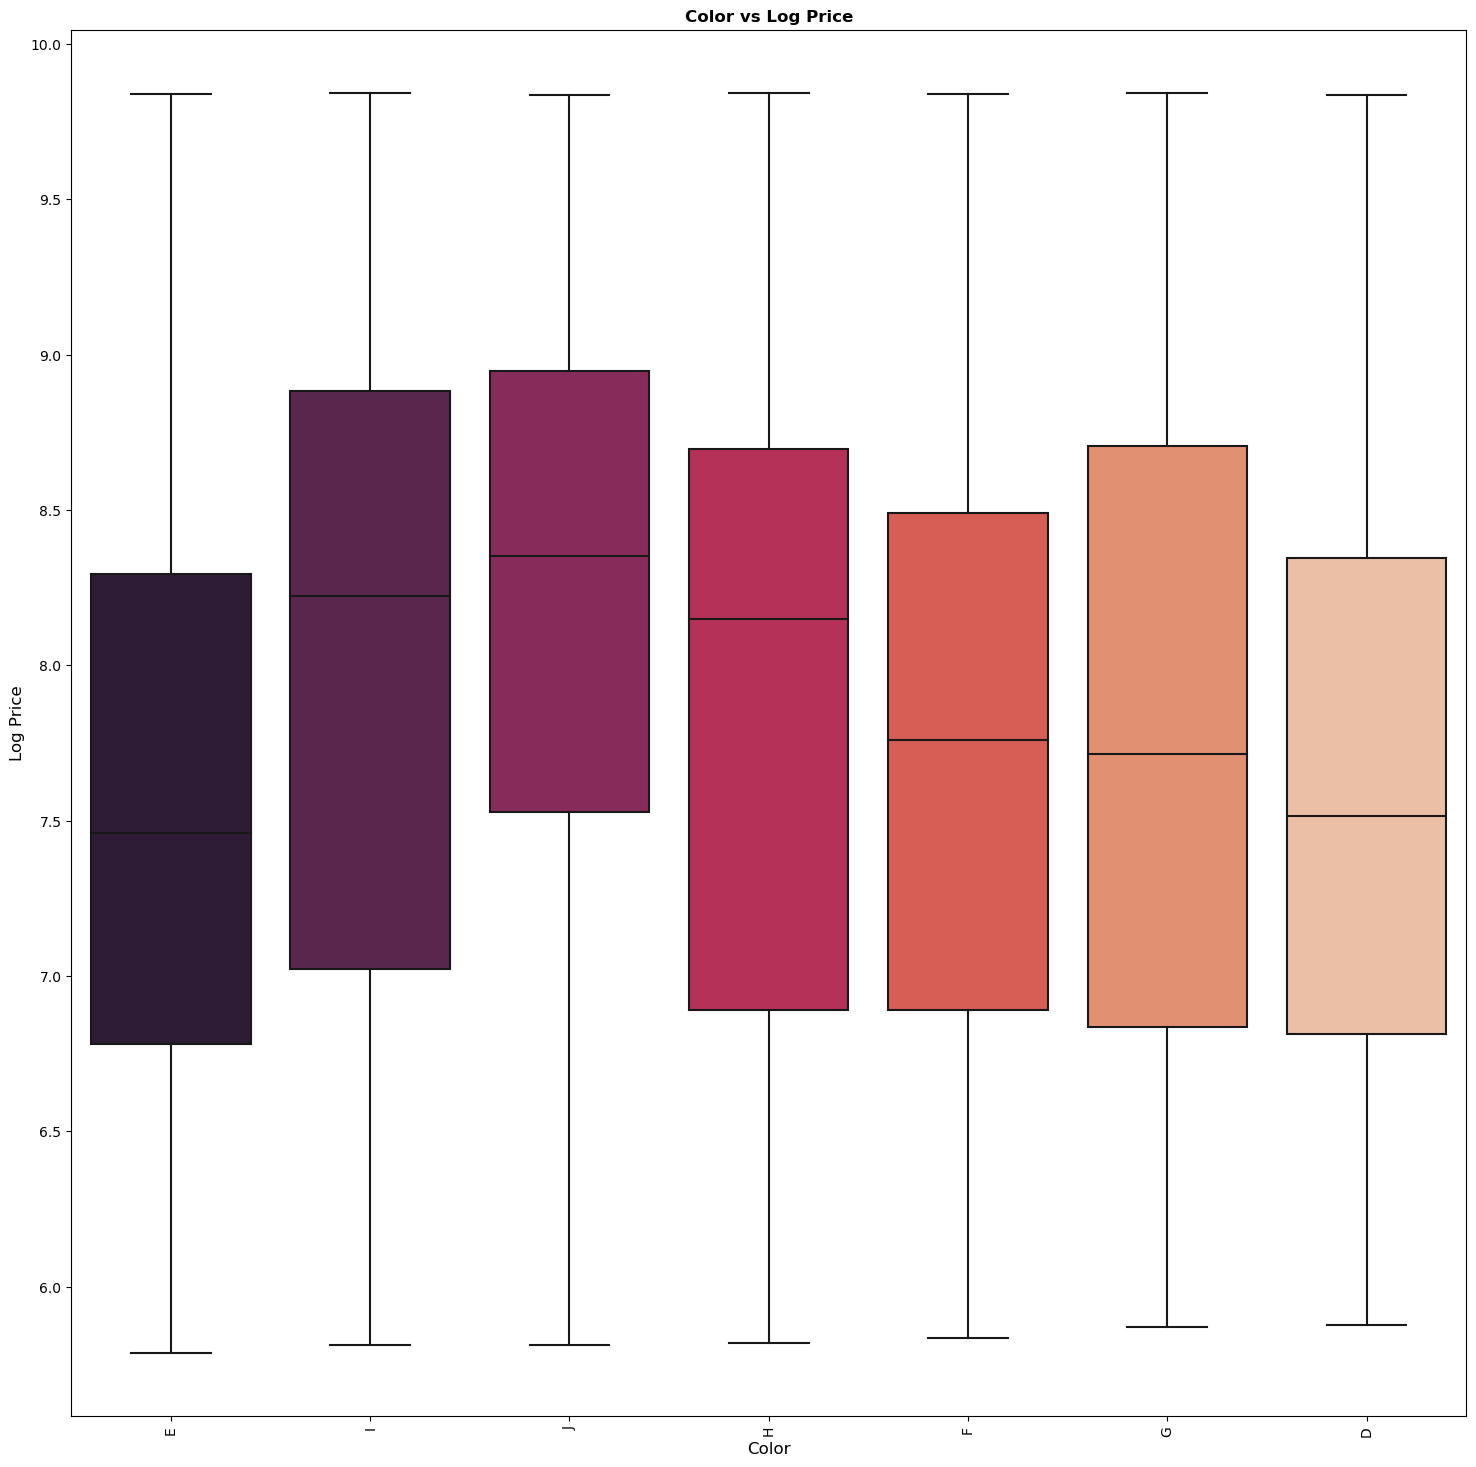

In [26]:
plt.figure(figsize = (18,18))
sns.boxplot(x = "color", y = "log_price", data = df, palette = 'rocket')
plt.xlabel('Color', fontsize = 12)
plt.ylabel("Log Price", fontsize = 12)
plt.xticks(rotation=90)
plt.title("Color vs Log Price", fontweight='bold')
plt.show()

In [32]:
model_01 =  ols ( formula = "log_price ~ C(color)" , data = df).fit()

In [32]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          3.77e-301
Time:                        17:54:04   Log-Likelihood:                -76617.
No. Observations:               53940   AIC:                         1.532e+05
Df Residuals:                   53933   BIC:                         1.533e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    625.984      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.370      0.018      -0.069      -0.006
C(color)[T.F]     0.1455      0.016      9.146      0.000       0.114       0.177
C(color)[T.G]     0.1727      0.015     11.219      0.000       0.143       0.203
C(color)[T.H]     0.3015      0.016     18.390      0.000       0.269       0.334
C(color)[T.I]     0.4061      0.018     22.250      0.000       0.370       0.442
C(color)[T.J]     0.5291      0.022     23.537      0.000       0.485       0.573
==============================================================================
Omnibus:                    11794.122   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2240.596
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       2.010   Cond. No.                         8.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
sm.stats.anova_lm ( model_01 ,typ = 2 )

,sum_sq,df,F,PR(>F)
C(color),1431.255783,6.0,237.807767,3.767555e-301
Residual,54099.661516,53933.0,NaN,NaN


In [34]:
#Puisque la valeur p est très petite et que nous pouvons rejeter l'hypothèse nulle selon laquelle
#price moyen est le même pour toutes les qualités de couleur de diamant
#Le test post-hoc
#est utile car l'ANOVA unidirectionnelle ne nous indique pas quelles couleurs sont associées à différents prix. Le test post hoc nous donnera plus d'informations.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
onway = pairwise_tukeyhsd(endog=df["log_price"],groups=df["log_price"],alpha = 0.05)
print(onway)

In [ ]:
#Chaque ligne représente une comparaison paritaire entre les prix de deux qualités de couleur de diamant.
#La colonne de rejet nous indique quelles hypothèses nulles nous pouvons rejeter. Sur la base des valeurs de cette colonne
#nous pouvons rejeter chaque hypothèse nulle, sauf lors de la comparaison des diamants de couleur D et E.
#Nous ne pouvons pas rejeter l'hypothèse nulle selon laquelle le prix des diamants de couleur D et E est le même.